In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from kneed import KneeLocator
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [75]:
dataset = pd.read_csv('features_final.csv') # uploading dataset 

In [76]:
dataset = dataset[["iata", "iso_country", "seaport_count", 
                   "airport_count", "build_count", "industrial_count", 
                   "tourism_count", "terminal_count", "runways_count", 
                   "name_city_1", "population_city_1", "dist_city_1", 
                   "name_city_2", "population_city_2", "dist_city_2", 
                   "name_city_3", "population_city_3", "dist_city_3", 
                   "population_around", "elevation_ft", "lighted", "max_length_ft", 
                   "width_ft", "aptclass", "apttype", "authority", "humuse", 
                   "natural_dis_risk", "informrisk", "lpi_customs", 
                   "lpi_infrastructure", "gard", "airport_area", "airport_type"]]
dataset

iata iso_country  seaport_count  airport_count  build_count  \
0    AAC          EG              0              2           74   
1    AAE          DZ              0              1           95   
2    AAZ          GT              0              5         2465   
3    ABD          IR              0              2          383   
4    ABS          EG              0              1          101   
..   ...         ...            ...            ...          ...   
966  ZNZ          TZ              0              1        55685   
967  ZOS          CL              0              3          137   
968  ZPC          CL              0              1         4268   
969  ZYL          BD              0              5        12179   
970  ZZU          MW              0              0        42239   

     industrial_count  tourism_count  terminal_count  runways_count  \
0                 276           1362               1              1   
1                 111            237               2              2   
2                  82           1279               2              1   
3                2308            829               1              2   
4                   3             24               0              2   
..                ...            ...             ...            ...   
966              1870           3485               0              1   
967               416           1334               1              2   
968               179           1114               0              1   
969                33            395               1              1   
970                13            105               2              1   

            name_city_1  ...   apttype  authority humuse  natural_dis_risk  \
0                 Arish  ...   Airport      Civil     No               4.9   
1                Annaba  ...   Airport      Civil     No               4.7   
2        Quetzaltenango  ...  Airfield      Civil     No               6.7   
3                Abadan  ...   Airport      Civil     No               6.8   
4            Abu Simbel  ...  Airfield      Civil     No               4.9   
..                  ...  ...       ...        ...    ...               ...   
966       Zanzibar City  ...   Airport      Civil     No               5.1   
967     Osorno Province  ...  Airfield      Civil     No               6.2   
968     Cautín Province  ...  Airstrip      Civil     No               6.2   
969  Sunamganj District  ...   Airport      Civil     No               8.2   
970               Mzuzu  ...   Airport      Civil     No               4.5   

     informrisk lpi_customs  lpi_infrastructure  gard  airport_area  \
0           5.1        2.67                2.91   NaN       3918622   
1           3.9        2.28                2.45   NaN       3726703   
2           5.5        2.35                2.27   NaN        715718   
3           5.0        2.46                2.67   NaN       3501077   
4           5.1        2.67                2.91   NaN       4203655   
..          ...         ...                 ...   ...           ...   
966         5.1        2.66                2.72   NaN       2506390   
967         2.8        3.23                3.09   NaN        935325   
968         2.8        3.23                3.09   NaN        446403   
969         5.8        2.33                2.36   NaN       1986265   
970         4.8        2.58                2.56   NaN        322805   

       airport_type  
0    medium_airport  
1    medium_airport  
2     small_airport  
3    medium_airport  
4    medium_airport  
..              ...  
966   large_airport  
967  medium_airport  
968   small_airport  
969  medium_airport  
970  medium_airport  

[971 rows x 34 columns]

In [77]:
# replacing missing values in population and distance with 0

dataset[["population_city_1", "population_city_2", "population_city_3", "dist_city_1", "dist_city_2", "dist_city_3"]] = dataset[["population_city_1", "population_city_2", "population_city_3", "dist_city_1", "dist_city_2", "dist_city_3"]].fillna(0)

In [78]:
# replacing empty fields 

dataset["lighted"] = dataset["lighted"].fillna(0)
dataset['apttype'] = dataset['apttype'].fillna("Unknown")
dataset['aptclass'] = dataset['aptclass'].fillna("Unknown")
dataset['authority'] = dataset['authority'].fillna("Unknown")
dataset['humuse'] = dataset['humuse'].fillna("Unknown")
dataset['gard'] = dataset['gard'].fillna("no")

In [79]:
# calculating population around 
dataset["population_around"] = dataset["population_city_1"] + dataset["population_city_2"] + dataset["population_city_3"]

In [80]:
# calculating tourism ratio

dataset["tourism_count"] = dataset['tourism_count'].replace(0,1) # replacing 0 with 1, so that there is no dividing by 0 when calculating the ratio
dataset["industrial_count"] = dataset['industrial_count'].replace(0,1)
dataset["tourism_industrial_ratio"] = dataset["tourism_count"] / dataset["industrial_count"]

In [389]:
dataset = dataset[["iata", "iso_country", "seaport_count", "airport_count", "build_count", "tourism_industrial_ratio", "terminal_count", "runways_count", "dist_city_1", "dist_city_2", "dist_city_3", "population_around", "elevation_ft", "lighted", "max_length_ft", "width_ft", "aptclass", "apttype", "authority", "humuse", "natural_dis_risk", "informrisk", "lpi_customs", "lpi_infrastructure", "gard", "airport_area", "airport_type"]]

In [390]:
# splitting data into train and test dataset

dataset_train, dataset_test = train_test_split(
    dataset,  test_size=0.33, random_state=42)

In [391]:
dataset_train

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN              0              0           51   
90   BIR          NP              0              5        44722   
911  UPB          CU              0              2          278   
181  CMB          LK              0              8        37677   
274  EOH          CO              0              3        18258   
..   ...         ...            ...            ...          ...   
106  BMO          MM              0              1          213   
270  ELG          DZ              0              0          127   
860  TKG          ID              0              1          276   
435  KAC          SY              0              2          892   
102  BLG          MY              0              1           64   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                 67.000000               1              2         0.00   
90                   1.465169               2              2         1.93   
911                 18.317597               1              1        23.30   
181                  0.993381               1              1        13.83   
274                  4.870536               1              1         3.21   
..                        ...             ...            ...          ...   
106                 27.750000               0              1         1.33   
270                 69.000000               2              2         5.01   
860                  3.517241               1              2        23.10   
435                  1.375000               3              1         3.96   
102                 15.250000               0              1        24.74   

     dist_city_2  ...   apttype       authority      humuse  natural_dis_risk  \
922         0.00  ...  Airstrip           Civil          No               7.4   
90         37.27  ...  Airfield           Civil          No               5.8   
911        25.26  ...  Airfield  Civil/Military     Unknown               5.6   
181        26.60  ...   Airport  Civil/Military          No               5.2   
274         3.37  ...   Airport           Civil     Unknown               6.7   
..           ...  ...       ...             ...         ...               ...   
106        10.73  ...  Airstrip           Civil          No               7.8   
270         0.00  ...   Airport           Civil          No               4.7   
860        42.78  ...  Airfield           Civil          No               7.7   
435        63.70  ...  Airstrip           Civil  Connection               5.7   
102        88.14  ...   Unknown         Unknown     Unknown               4.9   

     informrisk  lpi_customs lpi_infrastructure gard airport_area  \
922         3.7         2.86               2.92   no       955864   
90          5.2         2.19               2.20   no       748359   
911         2.4         2.15               2.09   no      2317842   
181         3.8         2.57               2.39  yes      3730055   
274         5.4         2.50               2.58   no       853011   
..          ...          ...                ...  ...          ...   
106         6.3         2.21               2.11   no       378722   
270         3.9         2.28               2.45   no      4126619   
860         4.8         2.69               2.81   no       960113   
435         7.3         1.70               2.12   no      3189011   
102         3.1         3.06               3.30   no        35414   

       airport_type  
922  medium_airport  
90   medium_airport  
911  medium_airport  
181   large_airport  
274  medium_airport  
..              ...  
106   small_airport  
270  medium_airport  
860  medium_airport  
435  medium_airport  
102   small_airport  

[650 rows x 27 columns]

In [392]:
dataset_train.describe()

seaport_count  airport_count    build_count  tourism_industrial_ratio  \
count     650.000000     650.000000     650.000000                650.000000   
mean        0.053846       2.369231    6647.527692                 22.107176   
std         0.335646       3.162128   18858.658122                 48.981639   
min         0.000000       0.000000       0.000000                  0.048556   
25%         0.000000       0.000000      83.250000                  1.710060   
50%         0.000000       1.000000     409.500000                  5.505682   
75%         0.000000       3.000000    3909.000000                 17.666667   
max         5.000000      35.000000  199412.000000                520.000000   

       terminal_count  runways_count  dist_city_1  dist_city_2  dist_city_3  \
count      650.000000     650.000000   650.000000   650.000000   650.000000   
mean         1.216923       1.341538    20.404000    42.304077    59.443662   
std          0.888563       0.496798    22.683899    28.860998    33.025213   
min          0.000000       1.000000     0.000000     0.000000     0.000000   
25%          1.000000       1.000000     5.170000    15.110000    34.610000   
50%          1.000000       1.000000    10.805000    43.610000    71.105000   
75%          1.000000       2.000000    27.100000    67.407500    85.740000   
max          6.000000       3.000000    99.150000    97.140000    99.990000   

       population_around  elevation_ft     lighted  max_length_ft    width_ft  \
count       6.500000e+02    594.000000  650.000000     596.000000  573.000000   
mean        2.313367e+06   1335.585859    0.650769    7839.743289  130.834206   
std         4.166447e+06   2096.118347    0.477094    2755.593628   29.381243   
min         0.000000e+00    -61.000000    0.000000    1501.000000   40.000000   
25%         2.459632e+05     49.000000    0.000000    5905.000000   98.000000   
50%         6.916375e+05    267.000000    1.000000    8031.500000  148.000000   
75%         2.134839e+06   1729.000000    1.000000    9843.000000  148.000000   
max         3.583140e+07  13355.000000    1.000000   14534.000000  200.000000   

       natural_dis_risk  informrisk  lpi_customs  lpi_infrastructure  \
count        648.000000  648.000000   631.000000          631.000000   
mean           6.440586    4.760340     2.588463            2.664897   
std            1.258580    1.037467     0.302344            0.378910   
min            3.500000    2.400000     1.700000            1.810000   
25%            5.600000    4.100000     2.380000            2.390000   
50%            6.700000    5.000000     2.620000            2.670000   
75%            7.700000    5.400000     2.780000            2.900000   
max            8.400000    8.100000     3.760000            4.100000   

       airport_area  
count  6.500000e+02  
mean   2.774102e+06  
std    3.622968e+06  
min    1.795100e+04  
25%    4.906750e+05  
50%    1.715352e+06  
75%    3.477716e+06  
max    3.481102e+07

In [393]:
dataset_test.describe()

seaport_count  airport_count    build_count  tourism_industrial_ratio  \
count     321.000000     321.000000     321.000000                321.000000   
mean        0.031153       2.292835    5809.383178                 31.663730   
std         0.206825       2.885564   16394.822618                100.169684   
min         0.000000       0.000000       0.000000                  0.021137   
25%         0.000000       1.000000      39.000000                  1.677419   
50%         0.000000       1.000000     241.000000                  5.791667   
75%         0.000000       3.000000    4552.000000                 23.000000   
max         2.000000      21.000000  171791.000000               1198.000000   

       terminal_count  runways_count  dist_city_1  dist_city_2  dist_city_3  \
count       321.00000     321.000000   321.000000   321.000000   321.000000   
mean          1.11215       1.376947    18.293769    41.813209    56.729159   
std           0.81770       0.562887    21.347515    29.717885    34.858410   
min           0.00000       1.000000     0.000000     0.000000     0.000000   
25%           1.00000       1.000000     4.190000    13.940000    23.940000   
50%           1.00000       1.000000     8.670000    43.060000    69.810000   
75%           1.00000       2.000000    24.220000    67.210000    85.280000   
max           5.00000       5.000000    96.590000    98.420000    99.840000   

       population_around  elevation_ft     lighted  max_length_ft    width_ft  \
count       3.210000e+02    297.000000  321.000000     297.000000  282.000000   
mean        2.081403e+06   1266.875421    0.632399    7832.316498  132.010638   
std         4.069059e+06   2171.861849    0.482905    2870.075377   31.640607   
min         0.000000e+00    -70.000000    0.000000    1616.000000   50.000000   
25%         1.479260e+05     55.000000    0.000000    5850.000000   98.000000   
50%         6.097440e+05    227.000000    1.000000    8035.000000  148.000000   
75%         1.741581e+06   1464.000000    1.000000    9843.000000  148.000000   
max         3.273457e+07  12552.000000    1.000000   15748.000000  246.000000   

       natural_dis_risk  informrisk  lpi_customs  lpi_infrastructure  \
count        320.000000  320.000000   315.000000          315.000000   
mean           6.496875    4.802812     2.598603            2.680794   
std            1.166159    0.983703     0.294665            0.357163   
min            3.500000    2.400000     1.700000            1.810000   
25%            5.775000    4.100000     2.410000            2.430000   
50%            6.700000    5.000000     2.620000            2.670000   
75%            7.400000    5.400000     2.780000            2.900000   
max            8.400000    8.100000     3.230000            3.360000   

       airport_area  
count  3.210000e+02  
mean   2.778936e+06  
std    3.981972e+06  
min    1.443000e+04  
25%    4.839220e+05  
50%    1.420994e+06  
75%    3.308032e+06  
max    2.557132e+07

In [394]:
# counting remaining empty fields

# dataset_train.isna().sum()
dataset_test.isna().sum()

iata                         0
iso_country                  0
seaport_count                0
airport_count                0
build_count                  0
tourism_industrial_ratio     0
terminal_count               0
runways_count                0
dist_city_1                  0
dist_city_2                  0
dist_city_3                  0
population_around            0
elevation_ft                24
lighted                      0
max_length_ft               24
width_ft                    39
aptclass                     0
apttype                      0
authority                    0
humuse                       0
natural_dis_risk             1
informrisk                   1
lpi_customs                  6
lpi_infrastructure           6
gard                         0
airport_area                 0
airport_type                 0
dtype: int64

In [395]:
# df_scaled = dataset_train
# col_names = ['elevation_ft','max_length_ft', 
#             'width_ft', 'natural_dis_risk', 
#             'informrisk', 'lpi_customs', 'lpi_infrastructure']

# features = df_scaled[col_names]

df_scaled_test = dataset_test
col_names = ['elevation_ft','max_length_ft', 
            'width_ft', 'natural_dis_risk', 
            'informrisk', 'lpi_customs', 'lpi_infrastructure']

features = df_scaled_test[col_names]

In [396]:
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# df_scaled[col_names] = imp.fit_transform(features.values)

# df_scaled

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df_scaled_test[col_names] = imp.fit_transform(features.values)

df_scaled_test

/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


iata iso_country  seaport_count  airport_count  build_count  \
168  CGY          PH              0              4         7019   
836  TCP          EG              0              4            2   
76   BEI          ET              0              3            4   
70   BDH          IR              0              4           55   
88   BHV          PK              0              1          142   
..   ...         ...            ...            ...          ...   
344  HGU          PG              0             19          284   
172  CIX          PE              0              0         4728   
125  BSK          DZ              0              0           37   
760  SBG          ID              0              1          943   
888  TTR          ID              0              4         1183   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
168                  1.163968               3              1        25.65   
836                 24.000000               1              2        15.59   
76                  12.000000               0              1        87.53   
70                   3.288889               0              1        80.16   
88                   1.477064               0              1        72.66   
..                        ...             ...            ...          ...   
344                 92.000000               1              2         8.35   
172                 10.600000               1              1         2.28   
125                  3.452381               1              1         6.32   
760                171.000000               1              2         3.03   
888                  2.158730               0              1        55.70   

     dist_city_2  ...   apttype  authority   humuse  natural_dis_risk  \
168        47.49  ...  Airfield      Civil       No               8.4   
836        62.65  ...   Airport      Civil       No               4.9   
76         90.74  ...  Airstrip      Civil       No               4.4   
70          0.00  ...  Airfield      Civil       No               6.8   
88         81.90  ...   Airport      Civil       No               7.4   
..           ...  ...       ...        ...      ...               ...   
344        33.15  ...   Unknown    Unknown  Unknown               6.7   
172         2.82  ...   Airport    Unknown       No               7.1   
125        74.39  ...  Airfield      Civil       No               4.7   
760        36.13  ...   Unknown    Unknown  Unknown               7.7   
888        68.73  ...   Unknown    Unknown  Unknown               7.7   

     informrisk  lpi_customs lpi_infrastructure gard airport_area  \
168         5.3         2.62               2.67   no      1490483   
836         5.1         2.67               2.91   no     18355719   
76          6.3         2.54               2.13   no       194081   
70          5.0         2.46               2.67   no      3088857   
88          6.1         2.41               2.43   no       741787   
..          ...          ...                ...  ...          ...   
344         5.8         2.37               2.11   no      1691678   
172         4.7         2.59               2.46  yes      2772719   
125         3.9         2.28               2.45   no      2704667   
760         4.8         2.69               2.81   no       728560   
888         4.8         2.69               2.81   no       120104   

       airport_type  
168   large_airport  
836  medium_airport  
76    small_airport  
70   medium_airport  
88   medium_airport  
..              ...  
344  medium_airport  
172  medium_airport  
125  medium_airport  
760   small_airport  
888   small_airport  

[321 rows x 27 columns]

In [397]:
df_scaled.isna().sum() # check again to see if there are no NaNs anymore
df_scaled_test.isna().sum()

iata                        0
iso_country                 0
seaport_count               0
airport_count               0
build_count                 0
tourism_industrial_ratio    0
terminal_count              0
runways_count               0
dist_city_1                 0
dist_city_2                 0
dist_city_3                 0
population_around           0
elevation_ft                0
lighted                     0
max_length_ft               0
width_ft                    0
aptclass                    0
apttype                     0
authority                   0
humuse                      0
natural_dis_risk            0
informrisk                  0
lpi_customs                 0
lpi_infrastructure          0
gard                        0
airport_area                0
airport_type                0
dtype: int64

In [443]:
col_names = ["seaport_count", "airport_count", "build_count", 
              "tourism_industrial_ratio", "terminal_count", "runways_count", 
              "dist_city_1", "dist_city_2", "dist_city_3", "population_around", 
              "elevation_ft", "max_length_ft", "width_ft", 
              "natural_dis_risk", "informrisk", "lpi_customs", "lpi_infrastructure", "airport_area"]

features = df_scaled[col_names]
# features = df_scaled_test[col_names]

array([[<AxesSubplot:title={'center':'seaport_count'}>,
        <AxesSubplot:title={'center':'airport_count'}>,
        <AxesSubplot:title={'center':'build_count'}>,
        <AxesSubplot:title={'center':'tourism_industrial_ratio'}>],
       [<AxesSubplot:title={'center':'terminal_count'}>,
        <AxesSubplot:title={'center':'runways_count'}>,
        <AxesSubplot:title={'center':'dist_city_1'}>,
        <AxesSubplot:title={'center':'dist_city_2'}>],
       [<AxesSubplot:title={'center':'dist_city_3'}>,
        <AxesSubplot:title={'center':'population_around'}>,
        <AxesSubplot:title={'center':'elevation_ft'}>,
        <AxesSubplot:title={'center':'lighted'}>],
       [<AxesSubplot:title={'center':'max_length_ft'}>,
        <AxesSubplot:title={'center':'width_ft'}>,
        <AxesSubplot:title={'center':'natural_dis_risk'}>,
        <AxesSubplot:title={'center':'informrisk'}>],
       [<AxesSubplot:title={'center':'lpi_customs'}>,
        <AxesSubplot:title={'center':'lpi_infrastr

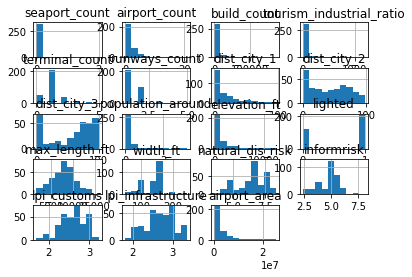

In [399]:
df_scaled_test.select_dtypes(include='number').hist()

/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


array([[<AxesSubplot:title={'center':'seaport_count'}>,
        <AxesSubplot:title={'center':'airport_count'}>,
        <AxesSubplot:title={'center':'build_count'}>,
        <AxesSubplot:title={'center':'tourism_industrial_ratio'}>],
       [<AxesSubplot:title={'center':'terminal_count'}>,
        <AxesSubplot:title={'center':'runways_count'}>,
        <AxesSubplot:title={'center':'dist_city_1'}>,
        <AxesSubplot:title={'center':'dist_city_2'}>],
       [<AxesSubplot:title={'center':'dist_city_3'}>,
        <AxesSubplot:title={'center':'population_around'}>,
        <AxesSubplot:title={'center':'elevation_ft'}>,
        <AxesSubplot:title={'center':'lighted'}>],
       [<AxesSubplot:title={'center':'max_length_ft'}>,
        <AxesSubplot:title={'center':'width_ft'}>,
        <AxesSubplot:title={'center':'natural_dis_risk'}>,
        <AxesSubplot:title={'center':'informrisk'}>],
       [<AxesSubplot:title={'center':'lpi_customs'}>,
        <AxesSubplot:title={'center':'lpi_infrastr

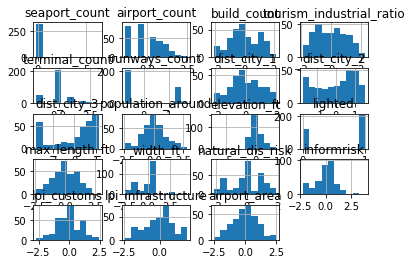

In [400]:
# from sklearn.preprocessing import PowerTransformer # applying a transformer that is okay to use with negative and 0 values
# scaler = PowerTransformer(method = 'yeo-johnson')


# df_scaled[col_names] = scaler.fit_transform(features.values)
# df_scaled

# df_scaled.hist()

from sklearn.preprocessing import PowerTransformer # applying a transformer that is okay to use with negative and 0 values
scaler = PowerTransformer(method = 'yeo-johnson')


df_scaled_test[col_names] = scaler.fit_transform(features.values)
df_scaled_test

df_scaled_test.hist()

<AxesSubplot:>

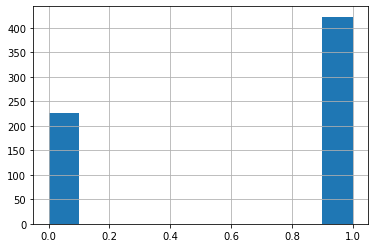

In [401]:
df_scaled['lighted'].hist()
# trying to change the distribution to more normal for the features that did not change under the 'yeo-johnson' transofrmation

array([[<AxesSubplot:title={'center':'seaport_count'}>,
        <AxesSubplot:title={'center':'airport_count'}>,
        <AxesSubplot:title={'center':'build_count'}>,
        <AxesSubplot:title={'center':'tourism_industrial_ratio'}>],
       [<AxesSubplot:title={'center':'terminal_count'}>,
        <AxesSubplot:title={'center':'runways_count'}>,
        <AxesSubplot:title={'center':'dist_city_1'}>,
        <AxesSubplot:title={'center':'dist_city_2'}>],
       [<AxesSubplot:title={'center':'dist_city_3'}>,
        <AxesSubplot:title={'center':'population_around'}>,
        <AxesSubplot:title={'center':'elevation_ft'}>,
        <AxesSubplot:title={'center':'lighted'}>],
       [<AxesSubplot:title={'center':'max_length_ft'}>,
        <AxesSubplot:title={'center':'width_ft'}>,
        <AxesSubplot:title={'center':'natural_dis_risk'}>,
        <AxesSubplot:title={'center':'informrisk'}>],
       [<AxesSubplot:title={'center':'lpi_customs'}>,
        <AxesSubplot:title={'center':'lpi_infrastr

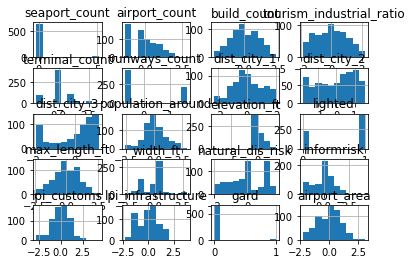

In [402]:
df_scaled.hist()

In [403]:
# from sklearn.preprocessing import OneHotEncoder
# enc = preprocessing.OneHotEncoder(handle_unknown='ignore') # encoding categorical features 

# cat_names = df_scaled.select_dtypes(include=['object']).drop(['iata'], axis=1).columns
# df_scaled[cat_names] = enc.fit(cat_features)

# cat_features = df_scaled[cat_names]
# enc.categories_

In [404]:
from sklearn.preprocessing import LabelBinarizer


In [445]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['iso_country'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

# cat_names = df_scaled_test.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled_test.copy()['iso_country'])
# lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)




In [446]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['aptclass'])
lb_aptclass_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_aptclass_df)

# cat_names = df_scaled_test.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled_test.copy()['aptclass'])
# lb_aptclass_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_aptclass_df)

     Domestic  International  Unknown
0           1              0        0
1           1              0        0
2           1              0        0
3           0              1        0
4           1              0        0
..        ...            ...      ...
645         1              0        0
646         0              1        0
647         1              0        0
648         1              0        0
649         0              0        1

[650 rows x 3 columns]


In [447]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['apttype'])
lb_apttype_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_apttype_df)

# cat_names = df_scaled_test.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled_test.copy()['apttype'])
# lb_apttype_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_apttype_df)

     Airfield  Airport  Airstrip  Unknown
0           0        0         1        0
1           1        0         0        0
2           1        0         0        0
3           0        1         0        0
4           0        1         0        0
..        ...      ...       ...      ...
645         0        0         1        0
646         0        1         0        0
647         1        0         0        0
648         0        0         1        0
649         0        0         0        1

[650 rows x 4 columns]


In [448]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['authority'])
lb_authority_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_authority_df)

# cat_names = df_scaled_test.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled_test.copy()['authority'])
# lb_authority_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_authority_df)

     Civil  Civil/Military  Military  Private  Unknown
0        1               0         0        0        0
1        1               0         0        0        0
2        0               1         0        0        0
3        0               1         0        0        0
4        1               0         0        0        0
..     ...             ...       ...      ...      ...
645      1               0         0        0        0
646      1               0         0        0        0
647      1               0         0        0        0
648      1               0         0        0        0
649      0               0         0        0        1

[650 rows x 5 columns]


In [449]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['humuse'])
lb_humuse_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_humuse_df)

# cat_names = df_scaled_test.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled_test.copy()['humuse'])
# lb_humuse_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_humuse_df)

     Closed  Connection  Helipad  Hub  No  Unknown  Upon Request
0         0           0        0    0   1        0             0
1         0           0        0    0   1        0             0
2         0           0        0    0   0        1             0
3         0           0        0    0   1        0             0
4         0           0        0    0   0        1             0
..      ...         ...      ...  ...  ..      ...           ...
645       0           0        0    0   1        0             0
646       0           0        0    0   1        0             0
647       0           0        0    0   1        0             0
648       0           1        0    0   0        0             0
649       0           0        0    0   0        1             0

[650 rows x 7 columns]


In [450]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['airport_type'])
lb_airport_type_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_airport_type_df

# cat_names = df_scaled_test.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled_test.copy()['airport_type'])
# lb_airport_type_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_airport_type_df)

large_airport  medium_airport  small_airport
0                0               1              0
1                0               1              0
2                0               1              0
3                1               0              0
4                0               1              0
..             ...             ...            ...
645              0               0              1
646              0               1              0
647              0               1              0
648              0               1              0
649              0               0              1

[650 rows x 3 columns]

In [451]:
df_scaled = df_scaled.copy()
df_scaled['gard'] = np.where(df_scaled['gard'].str.contains('yes'), 1, 0)

df_scaled.head()

# df_scaled_test = df_scaled_test.copy()
# df_scaled_test['gard'] = np.where(df_scaled_test['gard'].str.contains('yes'), 1, 0)

# df_scaled_test.head()

AttributeError: Can only use .str accessor with string values!

In [413]:
df_scaled_test

iata iso_country  seaport_count  airport_count  build_count  \
168  CGY          PH      -0.159872       0.992816     1.079943   
836  TCP          EG      -0.159872       0.992816    -1.688779   
76   BEI          ET      -0.159872       0.712286    -1.501951   
70   BDH          IR      -0.159872       0.992816    -0.627088   
88   BHV          PK      -0.159872      -0.258282    -0.291444   
..   ...         ...            ...            ...          ...   
344  HGU          PG      -0.159872       2.443667    -0.045896   
172  CIX          PE      -0.159872      -1.399053     0.942449   
125  BSK          DZ      -0.159872      -1.399053    -0.766543   
760  SBG          ID      -0.159872      -0.258282     0.377801   
888  TTR          ID      -0.159872       0.992816     0.457555   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
168                 -1.053790        1.952835      -0.726274     0.797554   
836                  0.846245        0.018018       1.352554     0.365933   
76                   0.442858       -1.774149      -0.726274     1.915253   
70                  -0.405243       -1.774149      -0.726274     1.833139   
88                  -0.917043       -1.774149      -0.726274     1.741757   
..                        ...             ...            ...          ...   
344                  1.487180        0.018018       1.352554    -0.149069   
172                  0.365813        0.018018      -0.726274    -1.069992   
125                 -0.372773        0.018018      -0.726274    -0.366536   
760                  1.724035        0.018018       1.352554    -0.890963   
888                 -0.682006       -1.774149      -0.726274     1.496298   

     dist_city_2  ...   apttype  authority   humuse  natural_dis_risk  \
168     0.349577  ...  Airfield      Civil       No          1.906883   
836     0.744593  ...   Airport      Civil       No         -1.339230   
76      1.381201  ...  Airstrip      Civil       No         -1.643043   
70     -1.754849  ...  Airfield      Civil       No          0.169275   
88      1.191323  ...   Airport      Civil       No          0.768769   
..           ...  ...       ...        ...      ...               ...   
344    -0.077324  ...   Unknown    Unknown  Unknown          0.075283   
172    -1.456979  ...   Airport    Unknown       No          0.461358   
125     1.023015  ...  Airfield      Civil       No         -1.465215   
760     0.016969  ...   Unknown    Unknown  Unknown          1.091721   
888     0.891322  ...   Unknown    Unknown  Unknown          1.091721   

     informrisk  lpi_customs lpi_infrastructure gard airport_area  \
168    0.480146     0.019610          -0.036012    0     0.064398   
836    0.265339     0.196623           0.646041    0     2.193451   
76     1.608704    -0.256826          -1.551804    0    -1.248906   
70     0.159341    -0.524969          -0.036012    0     0.617599   
88     1.375889    -0.688377          -0.713046    0    -0.421795   
..          ...          ...                ...  ...          ...   
344    1.033251    -0.816800          -1.607408    0     0.157078   
172   -0.152942    -0.085029          -0.628701    1     0.532541   
125   -0.942422    -1.098312          -0.656826    0     0.513121   
760   -0.049807     0.268346           0.361261    0    -0.433799   
888   -0.049807     0.268346           0.361261    0    -1.514018   

       airport_type  
168   large_airport  
836  medium_airport  
76    small_airport  
70   medium_airport  
88   medium_airport  
..              ...  
344  medium_airport  
172  medium_airport  
125  medium_airport  
760   small_airport  
888   small_airport  

[321 rows x 27 columns]

In [414]:
# result_df = pd.concat([df_scaled.copy(), lb_results_df], axis=1)

# print(result_df.head())

In [452]:
lb_aptclass_df.index=df_scaled.index
merged = pd.concat([df_scaled, lb_aptclass_df], axis=1)
merged

# lb_aptclass_df.index=df_scaled_test.index
# merged_test = pd.concat([df_scaled_test, lb_aptclass_df], axis=1)
# merged_test

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   
..                        ...             ...            ...          ...   
106                  1.026688       -1.845002      -0.702849    -1.520479   
270                  1.490090        0.978116       1.414785    -0.687347   
860                 -0.322266       -0.091762       1.414785     0.592793   
435                 -0.950320        1.757754      -0.702849    -0.858763   
102                  0.672872       -1.845002      -0.702849     0.655278   

     dist_city_2  ...  natural_dis_risk  informrisk  lpi_customs  \
922    -1.805792  ...          0.750987   -1.055509     0.911491   
90      0.006020  ...         -0.600567    0.376036    -1.322976   
911    -0.409011  ...         -0.747183   -2.026888    -1.447769   
181    -0.359437  ...         -1.025719   -0.970249    -0.088570   
274    -1.482522  ...          0.120368    0.591206    -0.322521   
..           ...  ...               ...         ...          ...   
106    -1.034752  ...          1.139085    1.628468    -1.260207   
270    -1.805792  ...         -1.346532   -0.883515    -1.038571   
860     0.178721  ...          1.040160   -0.037345     0.319262   
435     0.767777  ...         -0.674489    2.911102    -2.781828   
102     1.366630  ...         -1.221837   -1.535758     1.629607   

     lpi_infrastructure  gard  airport_area    airport_type Domestic  \
922            0.683298     0     -0.332423  medium_airport        1   
90            -1.245685     0     -0.496436  medium_airport        1   
911           -1.539557     0      0.325080  medium_airport        1   
181           -0.737541     1      0.723751   large_airport        0   
274           -0.228736     0     -0.409612  medium_airport        1   
..                  ...   ...           ...             ...      ...   
106           -1.486144     0     -0.916788   small_airport        1   
270           -0.576935     0      0.812872  medium_airport        0   
860            0.388020     0     -0.329384  medium_airport        1   
435           -1.459434     0      0.588669  medium_airport        1   
102            1.704797     0     -2.037369   small_airport        0   

    International Unknown  
922             0       0  
90              0       0  
911             0       0  
181             1       0  
274             0       0  
..            ...     ...  
106             0       0  
270             1       0  
860             0       0  
435             0       0  
102             0       1  

[650 rows x 30 columns]

In [453]:
lb_apttype_df.index=merged.index
merged = pd.concat([merged, lb_apttype_df], axis=1)
merged

# lb_apttype_df.index=merged_test.index
# merged_test = pd.concat([merged_test, lb_apttype_df], axis=1)
# merged_test

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   
..                        ...             ...            ...          ...   
106                  1.026688       -1.845002      -0.702849    -1.520479   
270                  1.490090        0.978116       1.414785    -0.687347   
860                 -0.322266       -0.091762       1.414785     0.592793   
435                 -0.950320        1.757754      -0.702849    -0.858763   
102                  0.672872       -1.845002      -0.702849     0.655278   

     dist_city_2  ...  gard  airport_area    airport_type  Domestic  \
922    -1.805792  ...     0     -0.332423  medium_airport         1   
90      0.006020  ...     0     -0.496436  medium_airport         1   
911    -0.409011  ...     0      0.325080  medium_airport         1   
181    -0.359437  ...     1      0.723751   large_airport         0   
274    -1.482522  ...     0     -0.409612  medium_airport         1   
..           ...  ...   ...           ...             ...       ...   
106    -1.034752  ...     0     -0.916788   small_airport         1   
270    -1.805792  ...     0      0.812872  medium_airport         0   
860     0.178721  ...     0     -0.329384  medium_airport         1   
435     0.767777  ...     0      0.588669  medium_airport         1   
102     1.366630  ...     0     -2.037369   small_airport         0   

     International Unknown Airfield Airport Airstrip Unknown  
922              0       0        0       0        1       0  
90               0       0        1       0        0       0  
911              0       0        1       0        0       0  
181              1       0        0       1        0       0  
274              0       0        0       1        0       0  
..             ...     ...      ...     ...      ...     ...  
106              0       0        0       0        1       0  
270              1       0        0       1        0       0  
860              0       0        1       0        0       0  
435              0       0        0       0        1       0  
102              0       1        0       0        0       1  

[650 rows x 34 columns]

In [454]:
lb_authority_df.index=merged.index
merged = pd.concat([merged, lb_authority_df], axis=1)
merged

# lb_authority_df.index=merged_test.index
# merged_test = pd.concat([merged_test, lb_authority_df], axis=1)
# merged_test

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   
..                        ...             ...            ...          ...   
106                  1.026688       -1.845002      -0.702849    -1.520479   
270                  1.490090        0.978116       1.414785    -0.687347   
860                 -0.322266       -0.091762       1.414785     0.592793   
435                 -0.950320        1.757754      -0.702849    -0.858763   
102                  0.672872       -1.845002      -0.702849     0.655278   

     dist_city_2  ... Unknown  Airfield  Airport  Airstrip Unknown  Civil  \
922    -1.805792  ...       0         0        0         1       0      1   
90      0.006020  ...       0         1        0         0       0      1   
911    -0.409011  ...       0         1        0         0       0      0   
181    -0.359437  ...       0         0        1         0       0      0   
274    -1.482522  ...       0         0        1         0       0      1   
..           ...  ...     ...       ...      ...       ...     ...    ...   
106    -1.034752  ...       0         0        0         1       0      1   
270    -1.805792  ...       0         0        1         0       0      1   
860     0.178721  ...       0         1        0         0       0      1   
435     0.767777  ...       0         0        0         1       0      1   
102     1.366630  ...       1         0        0         0       1      0   

    Civil/Military Military Private Unknown  
922              0        0       0       0  
90               0        0       0       0  
911              1        0       0       0  
181              1        0       0       0  
274              0        0       0       0  
..             ...      ...     ...     ...  
106              0        0       0       0  
270              0        0       0       0  
860              0        0       0       0  
435              0        0       0       0  
102              0        0       0       1  

[650 rows x 39 columns]

In [455]:
lb_humuse_df.index=merged.index
merged = pd.concat([merged, lb_humuse_df], axis=1)
merged

# lb_humuse_df.index=merged_test.index
# merged_test = pd.concat([merged_test, lb_humuse_df], axis=1)
# merged_test

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   
..                        ...             ...            ...          ...   
106                  1.026688       -1.845002      -0.702849    -1.520479   
270                  1.490090        0.978116       1.414785    -0.687347   
860                 -0.322266       -0.091762       1.414785     0.592793   
435                 -0.950320        1.757754      -0.702849    -0.858763   
102                  0.672872       -1.845002      -0.702849     0.655278   

     dist_city_2  ...  Military  Private Unknown  Closed  Connection  Helipad  \
922    -1.805792  ...         0        0       0       0           0        0   
90      0.006020  ...         0        0       0       0           0        0   
911    -0.409011  ...         0        0       0       0           0        0   
181    -0.359437  ...         0        0       0       0           0        0   
274    -1.482522  ...         0        0       0       0           0        0   
..           ...  ...       ...      ...     ...     ...         ...      ...   
106    -1.034752  ...         0        0       0       0           0        0   
270    -1.805792  ...         0        0       0       0           0        0   
860     0.178721  ...         0        0       0       0           0        0   
435     0.767777  ...         0        0       0       0           1        0   
102     1.366630  ...         0        0       1       0           0        0   

    Hub No Unknown Upon Request  
922   0  1       0            0  
90    0  1       0            0  
911   0  0       1            0  
181   0  1       0            0  
274   0  0       1            0  
..   .. ..     ...          ...  
106   0  1       0            0  
270   0  1       0            0  
860   0  1       0            0  
435   0  0       0            0  
102   0  0       1            0  

[650 rows x 46 columns]

In [456]:
lb_airport_type_df.index=merged.index
merged = pd.concat([merged, lb_airport_type_df], axis=1)
merged

# lb_airport_type_df.index=merged_test.index
# merged_test = pd.concat([merged_test, lb_airport_type_df], axis=1)
# merged_test

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   
..                        ...             ...            ...          ...   
106                  1.026688       -1.845002      -0.702849    -1.520479   
270                  1.490090        0.978116       1.414785    -0.687347   
860                 -0.322266       -0.091762       1.414785     0.592793   
435                 -0.950320        1.757754      -0.702849    -0.858763   
102                  0.672872       -1.845002      -0.702849     0.655278   

     dist_city_2  ...  Closed  Connection  Helipad  Hub  No  Unknown  \
922    -1.805792  ...       0           0        0    0   1        0   
90      0.006020  ...       0           0        0    0   1        0   
911    -0.409011  ...       0           0        0    0   0        1   
181    -0.359437  ...       0           0        0    0   1        0   
274    -1.482522  ...       0           0        0    0   0        1   
..           ...  ...     ...         ...      ...  ...  ..      ...   
106    -1.034752  ...       0           0        0    0   1        0   
270    -1.805792  ...       0           0        0    0   1        0   
860     0.178721  ...       0           0        0    0   1        0   
435     0.767777  ...       0           1        0    0   0        0   
102     1.366630  ...       0           0        0    0   0        1   

    Upon Request large_airport medium_airport small_airport  
922            0             0              1             0  
90             0             0              1             0  
911            0             0              1             0  
181            0             1              0             0  
274            0             0              1             0  
..           ...           ...            ...           ...  
106            0             0              0             1  
270            0             0              1             0  
860            0             0              1             0  
435            0             0              1             0  
102            0             0              0             1  

[650 rows x 49 columns]

In [457]:
data = merged
data = data[data.columns.difference(['iso_country', 'aptclass', 'apttype', 
                                     'authority', 'humuse', 'gard', 'airport_type',
                                     'Closed', 'Unknown'])]

# data_test = merged_test
# data_test = data_test[data_test.columns.difference(['iso_country', 'aptclass', 'apttype', 
#                                      'authority', 'humuse', 'gard', 'airport_type',
#                                      'Closed', 'Unknown'])]

In [444]:
# from sklearn.preprocessing import PowerTransformer # applying a transformer that is okay to use with negative and 0 values
# scaler = PowerTransformer(method = 'yeo-johnson')


# df_scaled_test[col_names] = scaler.fit_transform(features.values)
# df_scaled_test

# df_scaled_test.hist()

from sklearn.preprocessing import StandardScaler
# fit transform
transformer = StandardScaler()
df_scaled[col_names] = transformer.fit_transform(features.values)
df_scaled

print(df_scaled)

# df_scaled_test.hist()
# transformer.fit(data)
# # difference transform
# transformed = transformer.transform(data)
# print(transformed)

    iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.97

In [426]:
data_test.dtypes

Airfield                      int64
Airport                       int64
Airstrip                      int64
Civil                         int64
Civil/Military                int64
Connection                    int64
Domestic                      int64
Helipad                       int64
International                 int64
Military                      int64
No                            int64
Planned                       int64
Private                       int64
Upon Request                  int64
Yes                           int64
airport_area                float64
airport_count               float64
build_count                 float64
dist_city_1                 float64
dist_city_2                 float64
dist_city_3                 float64
elevation_ft                float64
iata                         object
informrisk                  float64
large_airport                 int64
lighted                     float64
lpi_customs                 float64
lpi_infrastructure          

In [458]:
# # moving iata to front

data = data[ ['iata'] + [ col for col in data.columns if col != 'iata' ] ]

# data_test = data_test[ ['iata'] + [ col for col in data_test.columns if col != 'iata' ] ]

In [459]:
data = data.loc[:, data.columns != 'iata']

# data_test = data_test.loc[:, data_test.columns != 'iata']


In [460]:
list(data.columns)

['Airfield',
 'Airport',
 'Airstrip',
 'Civil',
 'Civil/Military',
 'Connection',
 'Domestic',
 'Helipad',
 'Hub',
 'International',
 'Military',
 'No',
 'Private',
 'Upon Request',
 'airport_area',
 'airport_count',
 'build_count',
 'dist_city_1',
 'dist_city_2',
 'dist_city_3',
 'elevation_ft',
 'informrisk',
 'large_airport',
 'lighted',
 'lpi_customs',
 'lpi_infrastructure',
 'max_length_ft',
 'medium_airport',
 'natural_dis_risk',
 'population_around',
 'runways_count',
 'seaport_count',
 'small_airport',
 'terminal_count',
 'tourism_industrial_ratio',
 'width_ft']

In [344]:
names = ['Airfield',
 'Airport',
 'Airstrip',
 'Civil',
 'Civil/Military',
 'Connection',
 'Domestic',
 'Helipad',
 'Hub',
 'International',
 'Military',
 'No',
 'Private',
 'Upon Request',
 'airport_area',
 'airport_count',
 'build_count',
 'dist_city_1',
 'dist_city_2',
 'dist_city_3',
 'elevation_ft',
 'informrisk',
 'large_airport',
 'lighted',
 'lpi_customs',
 'lpi_infrastructure',
 'max_length_ft',
 'medium_airport',
 'natural_dis_risk',
 'population_around',
 'runways_count',
 'seaport_count',
 'small_airport',
 'terminal_count',
 'tourism_industrial_ratio',
 'width_ft']

data = data.values 

In [746]:
# data_test = data_test.values

In [745]:
# data = data.values

data_df = pd.DataFrame(data)


In [639]:

%matplotlib inline
import math
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib3
import joblib
import random
import matplotlib
from sompy.sompy import SOMFactory
from sompy.visualization.plot_tools import plot_hex_map
import logging

In [346]:
# Train the model with different parameters. The more, the better. Each iteration is stored in disk for further study 
for i in range(100): 
    sm = SOMFactory().build(data, mapsize=[random.choice(list(range(15, 25))), 
                                           random.choice(list(range(10, 15)))],
                            normalization = 'var', initialization='random', component_names=names, lattice="hexa") 
    sm.train(n_job=4, verbose=False, train_rough_len=30, train_finetune_len=100) 
    joblib.dump(sm, "model_{}.joblib".format(i))

In [640]:
# Train the model with different parameters. The more, the better. Each iteration is stored in disk for further study 
model_map_sizes = list()
for i in range(1):
    map_size_x = random.choice(list(range(15, 25)))
    map_size_y = random.choice(list(range(10, 15)))
#     print("size of model " + str(i) + ": " + str(map_size_x) + ", " + str(map_size_y))
    model_map_sizes.append((i, map_size_x, map_size_y))
    print("size of model " + str(model_map_sizes[i][0]) + ": " + str(model_map_sizes[i][1]) + ", " + str(model_map_sizes[i][2]))
    sm = SOMFactory().build(data, mapsize=[map_size_x, map_size_y],
                            normalization = 'var', initialization='random', component_names=names, lattice="hexa") 
    sm.train(n_job=4, verbose=False, train_rough_len=30, train_finetune_len=100) 
    joblib.dump(sm, "model_{}.joblib".format(i))
    print("some other size: ", end = '')
    print(*sm.calculate_map_size(sm), sep = ', ')

size of model 0: 23, 10
some other size: 9, 14


[9, 14]

In [645]:
# Study the models trained and plot the errors obtained in order to select the best one
models_pool = glob.glob("./model*")
errors=[]
for model_filepath in models_pool:
    sm = joblib.load(model_filepath)
    topographic_error = sm.calculate_topographic_error()
    quantization_error = sm.calculate_quantization_error()
    errors.append((topographic_error, quantization_error))
e_top, e_q = zip(*errors)

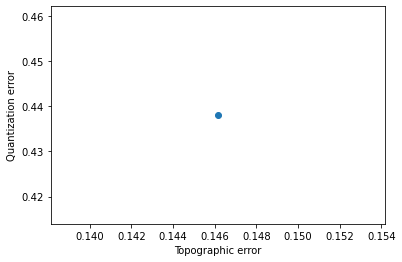

In [646]:
plt.scatter(e_top, e_q)
plt.xlabel("Topographic error")
plt.ylabel("Quantization error")
plt.show()

In [647]:
errors_df = pd.DataFrame(errors, columns = ['topographic_error', 'quantization_error'])


In [698]:
errors_df['topographic_error'].idxmin()

0

In [699]:
selected_model = 0

print("size of selected model " + str(model_map_sizes[selected_model][0]) + ": " +
      str(model_map_sizes[selected_model][1]) + ", " + str(model_map_sizes[selected_model][2]))

size of selected model 0: 23, 10


In [700]:
sm = joblib.load(models_pool[selected_model])

topographic_error = sm.calculate_topographic_error()
quantization_error = sm.calculate_quantization_error()
print("Topographic error = %s\nQuantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.14615384615384616
Quantization error = 0.43804987330219625


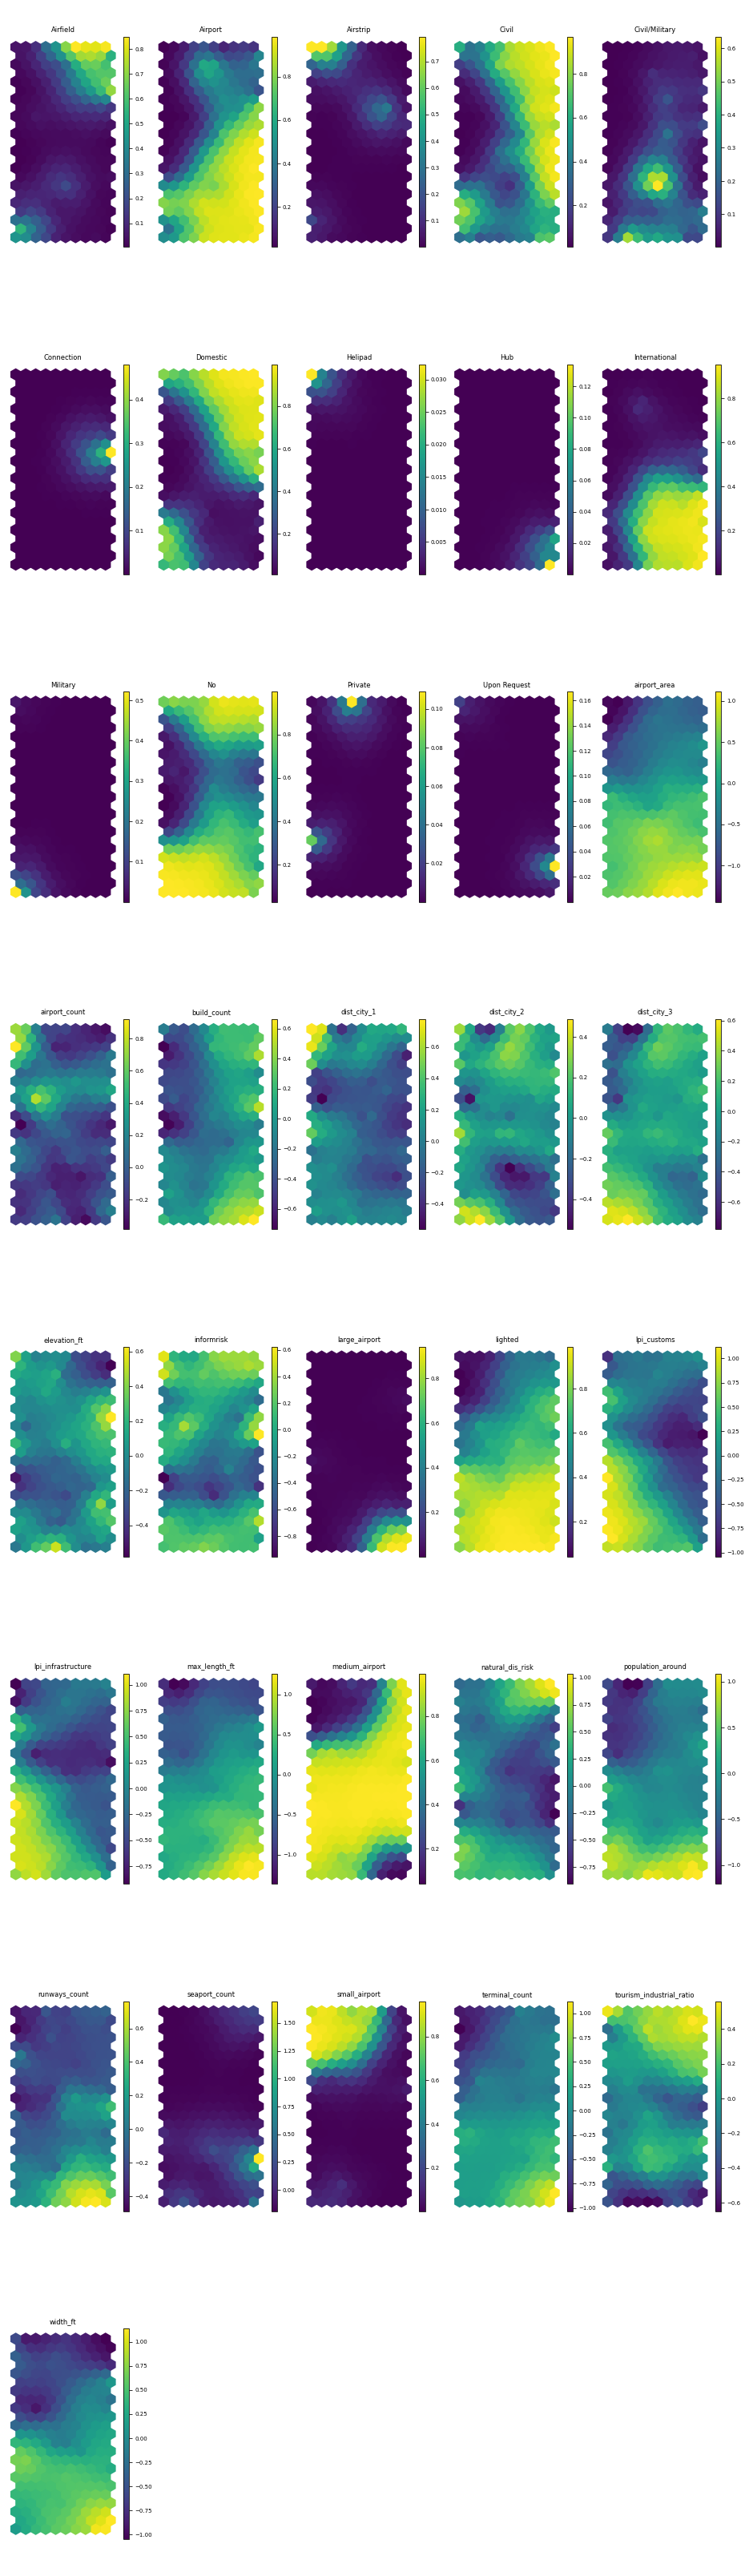

In [748]:
from sompy.visualization.mapview import View2D
view2D = View2D(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, which_dim="all", denormalize=True)
plt.savefig('View2D_try')

In [702]:
# Addition of some exogeneous variables to the map
# df["bmus"] = sm.project_data(data)
# df = df[clustering_vars + exogeneous_vars + ["Cancelled"] + ["bmus"]]

# empirical_codebook=df.groupby("bmus").mean().values
# matplotlib.rcParams.update({'font.size': 10})
# plot_hex_map(empirical_codebook.reshape(sm.codebook.mapsize + [empirical_codebook.shape[-1]]), 
#              titles=df.columns[:-1], shape=[4, 5], colormap=None)
# plt.show()

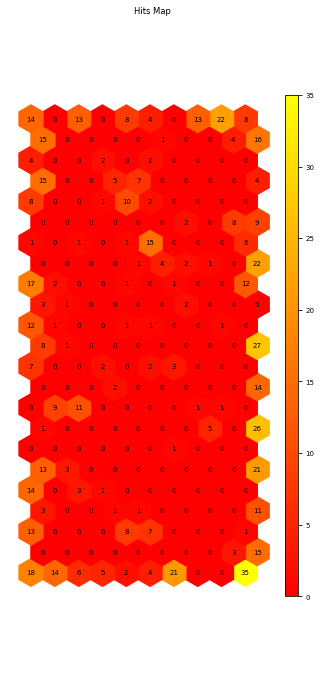

In [749]:
from sompy.visualization.bmuhits import BmuHitsView
#sm.codebook.lattice="rect"
vhts = BmuHitsView(12, 12, "Hits Map", text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.savefig('BmuHitsView_try')
# plt.show()

In [742]:
from collections import Counter

c = collections.Counter(sm._bmu[0])

bmu_counter = 0
som_cell = list()

for bmu in sm._bmu[0]:
    bmu_counter += 1
    som_cell.append(int(bmu))

som_cell

som_cell_df = pd.DataFrame(som_cell, columns=['som_cell'])
c

Counter({6.0: 5,
         30.0: 11,
         50.0: 21,
         210.0: 16,
         70.0: 26,
         150.0: 22,
         170.0: 9,
         189.0: 8,
         160.0: 6,
         87.0: 11,
         88.0: 9,
         220.0: 8,
         149.0: 17,
         10.0: 15,
         0.0: 35,
         9.0: 18,
         219.0: 15,
         222.0: 13,
         119.0: 8,
         199.0: 15,
         3.0: 21,
         196.0: 5,
         229.0: 14,
         109.0: 7,
         221.0: 22,
         49.0: 14,
         171.0: 8,
         103.0: 3,
         106.0: 2,
         209.0: 4,
         8.0: 14,
         24.0: 7,
         140.0: 12,
         133.0: 2,
         46.0: 1,
         154.0: 4,
         59.0: 13,
         110.0: 27,
         204.0: 2,
         186.0: 1,
         185.0: 10,
         224.0: 4,
         29.0: 13,
         211.0: 4,
         39.0: 3,
         225.0: 8,
         25.0: 8,
         195.0: 7,
         7.0: 6,
         90.0: 14,
         121.0: 1,
         165.0: 1,
         227.0

In [743]:
som_cell_df.index=dataset_train.index
som_result = pd.concat([dataset_train, som_cell_df], axis=1)


som_result.loc[som_result['som_cell'] == 110]

iata iso_country  seaport_count  airport_count  build_count  \
682  PMY          AR              0              1          915   
83   BHI          AR              0              0          191   
12   ADU          IR              0              1          416   
3    ABD          IR              0              2          383   
221  CZE          VE              0              1           44   
533  LUQ          AR              0              0          136   
933  VLN          VE              0              3          391   
271  ELU          DZ              0              1           89   
341  HDM          IR              0              1          144   
19   AFZ          IR              0              0            9   
803  SRY          IR              0              1            6   
17   AFL          BR              0              0         1458   
716  QSF          DZ              0              3          346   
190  CPC          AR              0              0           30   
152  CBH          DZ              0              0          299   
739  RJN          IR              0              2            3   
112  BNS          VE              0              2          393   
744  RSA          AR              0              0         1422   
384  IRJ          AR              0              0         7655   
900  UAQ          AR              0              0          109   
698  PSS          AR              0              2        22615   
574  MRX          IR              0              4         2276   
766  SDE          AR              0              1          210   
772  SFN          AR              0              2           89   
1    AAE          DZ              0              1           95   
840  TEE          DZ              0              1          312   
831  TBP          PE              0              1           16   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
682                  4.433962               1              2         5.61   
83                   7.954545               1              3         8.50   
12                   0.637131               2              2        13.74   
3                    0.359185               1              2         7.79   
221                  0.851852               0              1         2.22   
533                  1.597222               1              1         3.33   
933                  0.191887               1              1         8.06   
271                 12.875000               1              2         8.38   
341                  1.198413               1              2         8.36   
19                  17.666667               1              1         8.38   
803                  1.521531               1              2        14.46   
17                   1.500000               1              2         2.48   
716                  0.883598               1              1         7.79   
190                123.333333               1              2        18.65   
152                 38.000000               4              2         6.75   
739                  0.948387               0              1        12.39   
112                  7.500000               1              2         2.06   
744                  4.260870               1              1         3.80   
384                  0.592040               1              1         6.79   
900                  0.491870               1              1        11.82   
698                  1.048583               3              1         7.59   
574                  0.183486               1              2         4.43   
766                  5.545455               1              1         4.73   
772                  1.994220               1              2        13.70   
1                    2.135135               2              2         9.44   
840                  2.789474               1              2         3.53   
831                 14.056604               1   

In [720]:
from collections import Counter

c = collections.Counter(sm._bmu[0])

# bmus = sm.find_bmu(data)
# bmus_df = pd.DataFrame(bmus)
# bmus_df.to_csv(r'/Users/mariabrowarska/Downloads/export_bmus.csv', index=False, header=True)
# bmus_df


# 

bmu_counter = 0


for bmu in sm._bmu[0]:
    bmu_counter += 1
    print(int(bmu))

print("total: " + str(bmu_counter))

#grouped cells - cell: number of datapoints inside 

# c

6
30
50
210
70
150
170
150
189
50
160
87
50
88
70
50
220
50
70
149
10
0
9
50
219
222
119
199
3
196
150
10
229
109
221
0
149
3
49
229
222
87
171
103
0
160
70
30
199
149
106
209
8
149
24
140
170
8
87
133
46
154
59
229
229
24
8
59
110
219
204
110
50
70
3
8
186
30
70
222
110
185
224
29
50
140
211
10
39
150
171
196
49
225
185
225
25
3
195
221
0
3
119
189
70
219
149
87
103
199
221
7
229
222
90
121
9
50
222
219
0
165
90
227
29
70
90
129
164
196
3
47
224
50
210
167
229
4
4
227
29
90
58
104
150
225
209
173
70
129
173
221
145
221
70
150
110
70
10
140
206
50
29
229
49
160
227
222
210
0
220
189
225
221
110
150
20
227
3
25
227
110
153
110
150
185
10
0
185
170
149
211
30
0
118
189
9
10
88
49
30
221
110
90
185
221
11
29
59
88
10
211
210
4
70
63
221
139
70
160
119
221
30
219
140
221
24
150
221
110
195
5
10
0
70
154
221
199
49
129
106
35
110
9
50
29
103
225
0
149
0
227
110
8
164
210
47
70
25
221
152
110
210
7
9
110
210
110
125
90
119
196
219
3
204
171
164
171
139
224
139
90
0
96
88
8
222
70
24
148
25
1

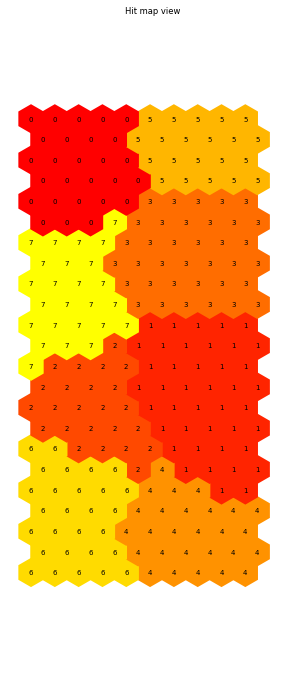

In [709]:
from sompy.visualization.hitmap import HitMapView

hitmap = HitMapView(12,12, "Hit map view", text_size=7)
hitmap.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn")
# plt.show()

/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/SOMPY-1.1.1-py3.6.egg/sompy/visualization/umatrix.py:48: UserWarning: No contour levels were found within the data range.


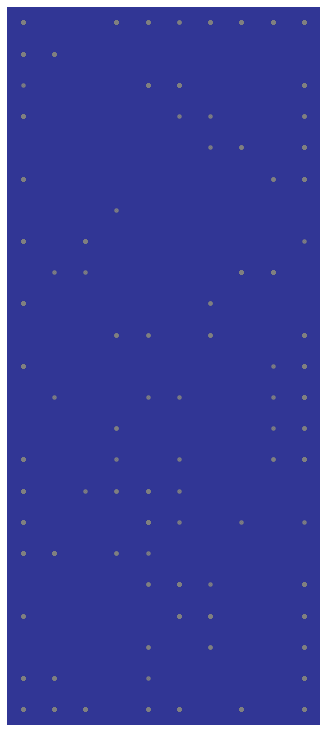

In [681]:
from sompy.visualization.umatrix import UMatrixView

umatrix = UMatrixView(12,12, "UMatrixView", text_size=7)
umatrix.show(sm, row_normalized=False)
plt.show()

In [721]:
map_labels = sm.cluster(n_clusters=4)
data_labels = np.array([map_labels[int(k)] for k in sm._bmu[0]])
data_labels

array([1, 1, 2, 0, 2, 2, 0, 2, 3, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 3, 1, 1,
       1, 2, 3, 0, 3, 3, 1, 3, 2, 1, 3, 1, 0, 1, 3, 1, 1, 3, 0, 1, 0, 2,
       1, 0, 2, 1, 3, 3, 2, 3, 1, 3, 1, 2, 0, 1, 1, 2, 1, 0, 1, 3, 3, 1,
       1, 1, 2, 3, 0, 2, 2, 2, 1, 1, 3, 1, 2, 0, 2, 3, 0, 1, 2, 2, 0, 1,
       1, 2, 0, 3, 1, 3, 3, 3, 1, 1, 3, 0, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3,
       0, 1, 3, 0, 2, 2, 1, 2, 0, 3, 1, 0, 2, 3, 1, 2, 2, 3, 0, 3, 1, 1,
       0, 2, 0, 3, 3, 1, 1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 3, 0, 0, 3, 0,
       2, 2, 2, 2, 1, 2, 3, 2, 1, 3, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 2, 2,
       1, 3, 1, 1, 3, 2, 0, 2, 2, 3, 1, 1, 3, 0, 3, 0, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 0, 2, 2, 3, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 3, 2, 0,
       3, 0, 1, 3, 2, 0, 1, 2, 0, 2, 3, 1, 1, 1, 2, 0, 0, 3, 1, 3, 2, 1,
       2, 1, 2, 1, 2, 3, 1, 3, 1, 3, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1,
       1, 2, 0, 2, 2, 2, 3, 3, 3, 1, 0, 0, 0, 0, 3, 0, 3, 2, 1, 2, 1, 1,
       0, 2, 1, 3, 1, 0, 1, 2, 3, 2, 3, 0, 0, 3, 1,

In [683]:
coordinates = sm.codebook.matrix
coodrinates_df = pd.DataFrame(sm.codebook.matrix)
coodrinates_df

0         1         2         3         4         5         6   \
0    1.628097 -0.737126 -0.286865  0.792678 -0.230455 -0.145999  1.064958   
1    1.559735 -0.696718 -0.267843  0.752231 -0.203288 -0.144673  1.055516   
2    1.577441 -0.739970 -0.226604  0.695192 -0.199259 -0.144649  1.041433   
3    1.657416 -0.827980 -0.189680  0.648778 -0.205132 -0.146361  1.033901   
4    1.267089 -0.667521  0.033325  0.548848 -0.245239 -0.146390  0.971619   
..        ...       ...       ...       ...       ...       ...       ...   
225 -0.281625  0.751552 -0.267311 -0.598796  0.780720 -0.148260 -0.527702   
226 -0.022074  0.529935 -0.230276 -0.558485  1.068389 -0.148285 -0.004132   
227  0.182244  0.357910 -0.203445 -0.608569  1.444335 -0.148328  0.451363   
228  0.560171  0.007143 -0.109016 -0.301745  0.528967 -0.148340  0.494362   
229  0.624750 -0.082964 -0.035301 -0.432538 -0.008991 -0.148352  0.400022   

           7         8         9   ...        26        27        28  \
0   -0.038905 -0.088045 -0.653882  ... -0.818249  0.570960  1.033189   
1   -0.037897 -0.088045 -0.652569  ... -0.794747  0.259991  0.933844   
2   -0.035511 -0.088045 -0.650411  ... -0.762911 -0.457576  0.770584   
3   -0.033221 -0.088045 -0.649593  ... -0.749747 -1.105913  0.650809   
4   -0.020068 -0.088045 -0.643625  ... -0.764018 -1.144513  0.417174   
..        ...       ...       ...  ...       ...       ...       ...   
225 -0.039253 -0.045274  0.989922  ...  0.777806  0.328854  0.428744   
226 -0.039253 -0.066903  0.303953  ...  0.561877  0.360184  0.383679   
227 -0.039253 -0.081455 -0.300519  ...  0.441665  0.389219  0.365829   
228 -0.039253 -0.084829 -0.456197  ...  0.303175  0.438126  0.451641   
229 -0.039253 -0.086816 -0.570308  ...  0.210164  0.439555  0.474024   

           29        30        31        32        33        34        35  
0   -0.112107 -0.102425  0.199460 -0.400411 -0.238003  0.472209 -1.044257  
1   -0.121324 -0.122023  0.144856 -0.048984 -0.218052  0.486188 -0.974657  
2   -0.115648 -0.143394  0.073733  0.763372 -0.155067  0.443045 -0.870124  
3   -0.102762 -0.156280  0.024715  1.497995 -0.098656  0.396200 -0.796454  
4   -0.388539 -0.255627 -0.058667  1.541802 -0.454376  0.430529 -0.719315  
..        ...       ...       ...       ...       ...       ...       ...  
225  1.002614  0.482575 -0.046504 -0.415695  0.361089 -0.650674  0.575953  
226  0.789059  0.312112  0.119031 -0.303507  0.240449 -0.612066  0.481446  
227  0.661564  0.180245  0.277820 -0.237882  0.156809 -0.631040  0.403655  
228  0.746092  0.154453  0.108690 -0.270477  0.144730 -0.471784  0.276044  
229  0.739136  0.154047 -0.032472 -0.258752  0.104834 -0.343268  0.151968  

[230 rows x 36 columns]

In [685]:
# codebook_matrix = sm.codebook.matrix
# # codebook_matrix_df = pd.DataFrame(codebook_matrix)
# print("reminder: size of selected model " + str(model_map_sizes[selected_model][0]) + ": " +
#       str(model_map_sizes[selected_model][1]) + ", " + str(model_map_sizes[selected_model][2]))
# print("this is: " + str(model_map_sizes[selected_model][1] * model_map_sizes[selected_model][2]))
# codebook_matrix_df
    
# # sm.codebook.matrix

reminder: size of selected model 0: 23, 10
this is: 230


Counter({6.0: 17,
         30.0: 16,
         50.0: 17,
         192.0: 3,
         70.0: 27,
         150.0: 21,
         170.0: 16,
         189.0: 12,
         160.0: 6,
         85.0: 3,
         88.0: 7,
         10.0: 39,
         124.0: 3,
         20.0: 4,
         33.0: 6,
         208.0: 13,
         194.0: 2,
         133.0: 7,
         199.0: 21,
         197.0: 3,
         207.0: 8,
         54.0: 4,
         221.0: 3,
         64.0: 5,
         217.0: 4,
         214.0: 15,
         87.0: 2,
         171.0: 10,
         103.0: 3,
         131.0: 3,
         114.0: 3,
         209.0: 9,
         44.0: 8,
         168.0: 9,
         24.0: 4,
         140.0: 5,
         8.0: 5,
         84.0: 1,
         206.0: 10,
         142.0: 3,
         43.0: 9,
         7.0: 1,
         110.0: 18,
         218.0: 5,
         204.0: 3,
         63.0: 5,
         22.0: 6,
         186.0: 7,
         226.0: 4,
         185.0: 5,
         225.0: 11,
         29.0: 9,
         130.0: 3,
  

In [664]:
# # sm.bmu_ind_to_xy(273)
# msz = sm.codebook.mapsize

# cents = sm.bmu_ind_to_xy(1, 2)

# cents
# # msz

TypeError: bmu_ind_to_xy() takes 2 positional arguments but 3 were given

Counter({293.0: 29, 0.0: 20, 252.0: 15, 280.0: 15, 182.0: 14, 8.0: 13, 13.0: 13, 289.0: 12, 3.0: 12, 42.0: 12, 210.0: 12, 209.0: 12, 126.0: 12, 287.0: 11, 70.0: 11, 11.0: 11, 286.0: 11, 281.0: 11, 283.0: 11, 153.0: 11, 288.0: 10, 41.0: 10, 78.0: 10, 84.0: 9, 6.0: 9, 55.0: 9, 44.0: 9, 266.0: 8, 7.0: 8, 291.0: 8, 5.0: 8, 265.0: 7, 292.0: 7, 207.0: 7, 98.0: 7, 282.0: 6, 170.0: 6, 97.0: 6, 154.0: 6, 195.0: 6, 45.0: 6, 238.0: 5, 111.0: 5, 237.0: 5, 140.0: 5, 202.0: 5, 217.0: 5, 175.0: 4, 177.0: 4, 165.0: 4, 137.0: 4, 4.0: 4, 149.0: 4, 52.0: 4, 249.0: 4, 203.0: 4, 181.0: 4, 226.0: 4, 10.0: 4, 256.0: 4, 145.0: 3, 156.0: 3, 186.0: 3, 284.0: 3, 239.0: 3, 224.0: 3, 141.0: 3, 77.0: 3, 47.0: 3, 218.0: 3, 164.0: 3, 108.0: 3, 161.0: 3, 93.0: 3, 285.0: 3, 232.0: 2, 74.0: 2, 56.0: 2, 204.0: 2, 139.0: 2, 112.0: 2, 61.0: 2, 171.0: 2, 220.0: 2, 290.0: 2, 274.0: 2, 248.0: 2, 148.0: 2, 199.0: 2, 31.0: 2, 162.0: 2, 146.0: 2, 20.0: 2, 69.0: 2, 196.0: 2, 206.0: 2, 277.0: 2, 12.0: 2, 83.0: 2, 125.0: 1, 255.0: 

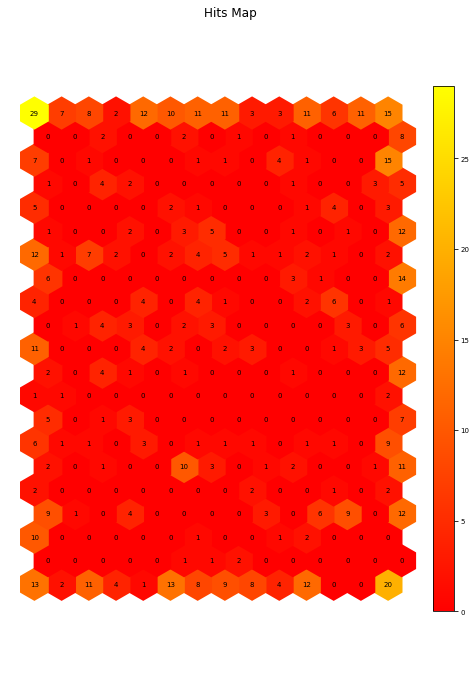

In [332]:
# from sompy.visualization.bmuhits import BmuHitsView
# #sm.codebook.lattice="rect"
# print(sm)
# vhts = BmuHitsView(12,12,"Hits Map",text_size=7)
# vhts.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)

# print(sm._bmu)

# # import collections

# # x = collections.Counter(sm._bmu[0])
# print(x)
# # y = list(x.elements())
# # print(y)

# # for letter in 'abcde':
# #     print(letter, x[letter])

# plt.show()


[5 5 5 1 1 1 1 1 1 3 5 5 5 1 1 1 1 1 1 3 5 5 5 1 1 1 1 1 3 3 5 5 5 5 1 1 1
 3 3 3 5 5 5 5 1 3 3 3 3 3 5 5 5 5 3 3 3 3 3 6 8 8 8 3 3 3 3 3 6 6 8 8 8 8
 3 3 3 6 6 6 8 8 8 8 3 6 6 6 6 6 8 8 8 8 2 2 6 6 6 6 7 7 7 2 2 2 2 6 6 6 7
 7 7 7 2 2 2 2 6 6 7 7 7 2 2 2 2 4 6 6 9 9 9 9 2 2 2 4 4 4 9 9 9 9 0 0 4 4
 4 4 9 9 9 9 0 0 0 4 4 4 9 9 9 0 0 0 0 4 4 4 9 9 9 0 0 0 0 4 4 4]


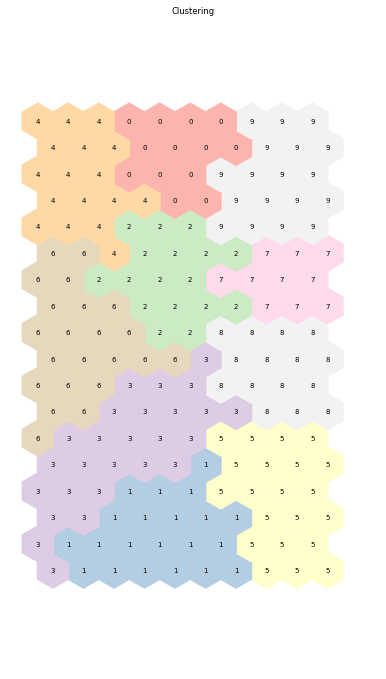

In [357]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(10)

hits  = HitMapView(12, 12,"Clustering",text_size=10, cmap=plt.cm.jet)
a=hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
print(getattr(sm, 'cluster_labels'))
plt.show()

## XXX

In [229]:
names = ['Airfield',
 'Airport',
 'Airstrip',
 'Civil',
 'Civil/Military',
 'Connection',
 'Domestic',
 'Helipad',
 'Hub',
 'International',
 'Military',
 'No',
 'Private',
 'Upon Request',
 'airport_area',
 'airport_count',
 'build_count',
 'dist_city_1',
 'dist_city_2',
 'dist_city_3',
 'elevation_ft',
 'informrisk',
 'large_airport',
 'lighted',
 'lpi_customs',
 'lpi_infrastructure',
 'max_length_ft',
 'medium_airport',
 'natural_dis_risk',
 'population_around',
 'runways_count',
 'seaport_count',
 'small_airport',
 'terminal_count',
 'tourism_industrial_ratio',
 'width_ft']

data = df_scaled

In [232]:
data = data[data.columns.difference(['iso_country', 'aptclass', 'apttype', 
                                     'authority', 'humuse', 'gard', 'airport_type',
                                     'Closed', 'Unknown'])]
data = data.loc[:, data.columns != 'iata']

data = data.values

In [233]:
# Train the model with different parameters. The more, the better. Each iteration is stored in disk for further study 
for i in range(100): 
    sm = SOMFactory().build(data, mapsize=[random.choice(list(range(15, 25))), 
                                           random.choice(list(range(10, 15)))],
                            normalization = 'var', initialization='random', component_names=names, lattice="hexa") 
    sm.train(n_job=4, verbose=False, train_rough_len=30, train_finetune_len=100) 
    joblib.dump(sm, "model_{}.joblib".format(i))

In [ ]:
# Study the models trained and plot the errors obtained in order to select the best one
models_pool = glob.glob("./model*")
errors=[]
for model_filepath in models_pool:
    sm = joblib.load(model_filepath)
    topographic_error = sm.calculate_topographic_error()
    quantization_error = sm.calculate_quantization_error()
    errors.append((topographic_error, quantization_error))
e_top, e_q = zip(*errors)

In [ ]:
plt.scatter(e_top, e_q)
plt.xlabel("Topographic error")
plt.ylabel("Quantization error")
plt.show()

In [ ]:
errors_df = pd.DataFrame(errors, columns = ['topographic_error', 'quantization_error'])
errors_df

In [ ]:
errors_df['topographic_error'].idxmin()

In [ ]:
selected_model = 3

In [ ]:
sm = joblib.load(models_pool[selected_model])

topographic_error = sm.calculate_topographic_error()
quantization_error = sm.calculate_quantization_error()
print ("Topographic error = %s\n Quantization error = %s" % (topographic_error, quantization_error))

In [ ]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, which_dim="all", denormalize=True)
plt.show()

In [ ]:
from sompy.visualization.bmuhits import BmuHitsView
#sm.codebook.lattice="rect"
vhts  = BmuHitsView(12,12,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

In [ ]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(5)

hits  = HitMapView(12, 12,"Clustering",text_size=10, cmap=plt.cm.jet)
a=hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

## Susi try

In [608]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs



import susi
from susi.SOMPlots import plot_nbh_dist_weight_matrix, plot_umatrix, plot_som_histogram


In [592]:
X = data
som = susi.SOMClustering(
    n_rows=30,
    n_columns=30
)
som.fit(X)
print("SOM fitted!")

SOM fitted!


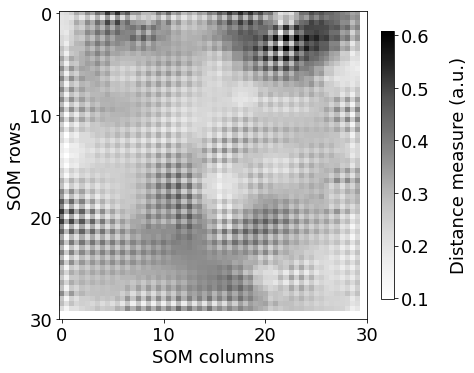

In [593]:
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 30, 30)
plt.show()

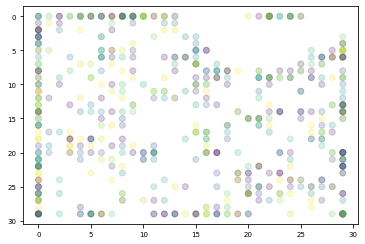

In [594]:
clusters = som.get_clusters(X)
plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=y, alpha=0.2)
plt.gca().invert_yaxis()
plt.show()

In [619]:
plot_som_histogram()

TypeError: 'list' object is not callable

[array([25,  0]),
 array([18,  5]),
 array([27, 21]),
 array([23, 22]),
 array([ 0, 12]),
 array([29, 29]),
 array([ 0, 22]),
 array([25, 28]),
 array([ 8, 26]),
 array([26, 20]),
 array([20, 24]),
 array([0, 4]),
 array([26, 20]),
 array([25,  0]),
 array([10,  2]),
 array([26, 20]),
 array([ 0, 25]),
 array([20, 23]),
 array([6, 6]),
 array([24, 19]),
 array([22,  0]),
 array([20,  3]),
 array([28,  4]),
 array([29, 29]),
 array([ 9, 22]),
 array([10, 27]),
 array([0, 9]),
 array([ 5, 28]),
 array([8, 0]),
 array([20, 17]),
 array([29, 29]),
 array([14,  6]),
 array([14, 23]),
 array([23,  8]),
 array([ 6, 29]),
 array([14,  0]),
 array([ 0, 24]),
 array([ 6, 26]),
 array([29, 11]),
 array([17, 27]),
 array([ 9, 27]),
 array([4, 0]),
 array([27, 29]),
 array([5, 6]),
 array([ 7, 15]),
 array([21, 24]),
 array([5, 6]),
 array([20,  4]),
 array([ 9, 24]),
 array([25, 20]),
 array([29, 20]),
 array([ 8, 16]),
 array([14,  4]),
 array([18, 14]),
 array([17,  2]),
 array([22, 21]),
 array

(array([[22., 13.,  9.,  4., 17.,  6., 11., 20.,  7., 16.],
        [ 7.,  8.,  8.,  4.,  6.,  4.,  1.,  6.,  1., 11.],
        [12.,  6.,  3.,  6.,  5.,  6.,  3.,  3.,  8.,  5.],
        [ 8.,  5.,  2.,  1.,  7.,  1.,  3.,  6.,  7.,  4.],
        [23.,  0.,  4.,  2.,  4.,  7.,  2.,  0.,  4.,  7.],
        [28.,  4.,  7.,  0.,  1.,  1.,  5.,  5.,  5., 23.],
        [18.,  6.,  6.,  3.,  7.,  1.,  4.,  3.,  1.,  8.],
        [ 0.,  0.,  7.,  4.,  2.,  3.,  4.,  3.,  3.,  8.],
        [ 0.,  0.,  1.,  3.,  2.,  3.,  6.,  6.,  3., 10.],
        [24.,  0.,  0.,  4., 17., 17., 12.,  5.,  1., 31.]]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <matplotlib.collections.QuadMesh at 0x7fe79a49e0b8>)

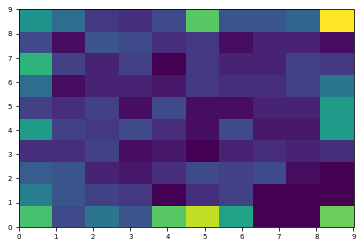

In [623]:
import susi
import matplotlib.pyplot as plt
som = susi.SOMClustering()
som.fit(X)
bmu_list = som.get_bmus(X)
plt.hist2d([x[0] for x in bmu_list], [x[1] for x in bmu_list])


In [627]:
som.get_datapoints_from_node([9,9])

[0,
 13,
 62,
 66,
 88,
 111,
 124,
 136,
 207,
 231,
 263,
 281,
 284,
 333,
 358,
 371,
 376,
 377,
 390,
 395,
 451,
 462,
 478,
 510,
 519,
 533,
 559,
 569,
 601,
 628,
 643]

In [625]:
clusters = som.get_clusters(X)
clusters_df = pd.DataFrame(clusters)
clusters_df

0  1
0    9  9
1    9  4
2    5  0
3    6  0
4    8  3
..  .. ..
645  8  8
646  4  0
647  0  8
648  7  3
649  3  7

[650 rows x 2 columns]

In [628]:
som.transform(X)
som.get_datapoints_from_node([9,9])

[0,
 13,
 62,
 66,
 88,
 111,
 124,
 136,
 207,
 231,
 263,
 281,
 284,
 333,
 358,
 371,
 376,
 377,
 390,
 395,
 451,
 462,
 478,
 510,
 519,
 533,
 559,
 569,
 601,
 628,
 643]